In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ilyaryabov/general-knowledge-qa")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/general-knowledge-qa


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.initializers import Constant
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('/kaggle/input/general-knowledge-qa/general_knowledge_qa.csv')
df.head()

,question,answer,question_type,image
0,How many days do we have in a week?,Seven,General Knowledge For Kids,NaN
1,How many days are there in a normal year?,365 (not a leap year),General Knowledge For Kids,NaN
2,How many colors are there in a rainbow?,7,General Knowledge For Kids,NaN
3,Which animal is known as the ‘Ship of the Dese...,Camel,General Knowledge For Kids,NaN
4,How many letters are there in the English alph...,26,General Knowledge For Kids,NaN


In [4]:
df.shape

(930, 4)

In [5]:
df.apply(pd.isnull).sum()

question           0
answer             0
question_type      0
image            919
dtype: int64

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(928, 4)

In [9]:
df['answer'].nunique()

669

In [10]:
df['answer'].value_counts()

answer
TRUE         12
7             8
India         8
4             7
11            6
             ..
99            1
Bow-Bow       1
A,E,I,O,U     1
Hospital      1
SONAR         1
Name: count, Length: 669, dtype: int64

In [11]:
df[df['answer'] == '7']

,question,answer,question_type,image
2,How many colors are there in a rainbow?,7,General Knowledge For Kids,NaN
143,"2, 6, 7, 10",7,General Knowledge For Kids,NaN
231,How many days are there in a week?,7,GK Questions For Class 1,NaN
234,How many colours are there in a rainbow?,7,GK Questions For Class 1,NaN
370,How many colours are there in a rainbow?,7,GK Questions For Class 2,NaN
401,How many members are there in a Water Polo team?,7,GK Questions For Class 2,NaN
573,A heptagon has _____ sides.,7,GK Questions For Class 4,NaN
578,How many oceans are there in the world?,7,GK Questions For Class 4,NaN


In [13]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 15.7 MB/s eta 0:00:00


In [14]:
import nlpaug.augmenter.word as naw

In [16]:
aug = naw.SynonymAug(aug_src='wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [19]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [20]:
df['aug1'] = df['question'].apply(aug.augment)

In [21]:
df['aug2'] = df['question'].apply(aug.augment)

In [22]:
df['aug3'] = df['question'].apply(aug.augment)

In [23]:
df['aug4'] = df['question'].apply(aug.augment)

In [24]:
df.head()

,question,answer,question_type,image,aug1,aug2,aug3,aug4
0,How many days do we have in a week?,Seven,General Knowledge For Kids,NaN,[How many days do we have in a week?],[How many days cause we have in a week?],[How many days perform we have in a week?],[How many day do we have in a week?]
1,How many days are there in a normal year?,365 (not a leap year),General Knowledge For Kids,NaN,[How many twenty four hours are in that locati...,[How many days are on that point in a normal t...,[How many days are in that location in a norma...,[How many day are there in a normal year?]
2,How many colors are there in a rainbow?,7,General Knowledge For Kids,NaN,[How many colors are in that location in a rai...,[How many colouration are there in a rainbow?],[How many colour are there in a rainbow?],[How many colors are there in a rainbow?]
3,Which animal is known as the ‘Ship of the Dese...,Camel,General Knowledge For Kids,NaN,[Which beast be get laid as the ‘ Ship of the ...,[Which animal is known as the ‘ Ship of the De...,[Which animal is bonk as the ‘ Ship of the Des...,[Which animal personify know as the ‘ Ship of ...
4,How many letters are there in the English alph...,26,General Knowledge For Kids,NaN,[How many letters are there in the Side alphab...,[How many letters are there in the Side alphab...,[How many letters be on that point in the Engl...,[How many alphabetic character are there in th...


In [25]:
def text_ext(text):
    return text[0]

In [26]:
df['aug1'] = df['aug1'].apply(text_ext)
df['aug2'] = df['aug2'].apply(text_ext)
df['aug3'] = df['aug3'].apply(text_ext)
df['aug4'] = df['aug4'].apply(text_ext)

In [27]:
df.head()

,question,answer,question_type,image,aug1,aug2,aug3,aug4
0,How many days do we have in a week?,Seven,General Knowledge For Kids,NaN,How many days do we have in a week?,How many days cause we have in a week?,How many days perform we have in a week?,How many day do we have in a week?
1,How many days are there in a normal year?,365 (not a leap year),General Knowledge For Kids,NaN,How many twenty four hours are in that locatio...,How many days are on that point in a normal tw...,How many days are in that location in a normal...,How many day are there in a normal year?
2,How many colors are there in a rainbow?,7,General Knowledge For Kids,NaN,How many colors are in that location in a rain...,How many colouration are there in a rainbow?,How many colour are there in a rainbow?,How many colors are there in a rainbow?
3,Which animal is known as the ‘Ship of the Dese...,Camel,General Knowledge For Kids,NaN,Which beast be get laid as the ‘ Ship of the D...,Which animal is known as the ‘ Ship of the Des...,Which animal is bonk as the ‘ Ship of the Dese...,Which animal personify know as the ‘ Ship of t...
4,How many letters are there in the English alph...,26,General Knowledge For Kids,NaN,How many letters are there in the Side alphabet?,How many letters are there in the Side alphabet?,How many letters be on that point in the Engli...,How many alphabetic character are there in the...


In [28]:
df1 = df[['aug1', 'answer']]
df2 = df[['aug2', 'answer']]
df3 = df[['aug3', 'answer']]
df4 = df[['aug4', 'answer']]
df5 = df[['question', 'answer']]

In [29]:
df1.head()

,aug1,answer
0,How many days do we have in a week?,Seven
1,How many twenty four hours are in that locatio...,365 (not a leap year)
2,How many colors are in that location in a rain...,7
3,Which beast be get laid as the ‘ Ship of the D...,Camel
4,How many letters are there in the Side alphabet?,26


In [30]:
df1.rename({
    'aug1' : 'question'
}, axis = 1, inplace = True)

<ipython-input-30-b9adaf466981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({


In [31]:
df1.head()

,question,answer
0,How many days do we have in a week?,Seven
1,How many twenty four hours are in that locatio...,365 (not a leap year)
2,How many colors are in that location in a rain...,7
3,Which beast be get laid as the ‘ Ship of the D...,Camel
4,How many letters are there in the Side alphabet?,26


In [32]:
df2.rename({
    'aug2' : 'question'
}, axis = 1, inplace = True)

<ipython-input-32-43cd2769385e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename({


In [33]:
df3.rename({
    'aug3': 'question'
}, axis = 1, inplace = True)

<ipython-input-33-f01a537b9ac9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename({


In [34]:
df4.rename({
    'aug4' : 'question'
}, axis = 1, inplace = True)

<ipython-input-34-2811699b3cda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename({


In [35]:
df_t = pd.concat([df1, df2, df3, df4])

In [36]:
df_t.head()

,question,answer
0,How many days do we have in a week?,Seven
1,How many twenty four hours are in that locatio...,365 (not a leap year)
2,How many colors are in that location in a rain...,7
3,Which beast be get laid as the ‘ Ship of the D...,Camel
4,How many letters are there in the Side alphabet?,26


In [37]:
df_t.shape

(3712, 2)

In [38]:
df.head()

,question,answer,question_type,image,aug1,aug2,aug3,aug4
0,How many days do we have in a week?,Seven,General Knowledge For Kids,NaN,How many days do we have in a week?,How many days cause we have in a week?,How many days perform we have in a week?,How many day do we have in a week?
1,How many days are there in a normal year?,365 (not a leap year),General Knowledge For Kids,NaN,How many twenty four hours are in that locatio...,How many days are on that point in a normal tw...,How many days are in that location in a normal...,How many day are there in a normal year?
2,How many colors are there in a rainbow?,7,General Knowledge For Kids,NaN,How many colors are in that location in a rain...,How many colouration are there in a rainbow?,How many colour are there in a rainbow?,How many colors are there in a rainbow?
3,Which animal is known as the ‘Ship of the Dese...,Camel,General Knowledge For Kids,NaN,Which beast be get laid as the ‘ Ship of the D...,Which animal is known as the ‘ Ship of the Des...,Which animal is bonk as the ‘ Ship of the Dese...,Which animal personify know as the ‘ Ship of t...
4,How many letters are there in the English alph...,26,General Knowledge For Kids,NaN,How many letters are there in the Side alphabet?,How many letters are there in the Side alphabet?,How many letters be on that point in the Engli...,How many alphabetic character are there in the...


In [39]:
df = df[['question', 'answer']]

In [40]:
df.head()

,question,answer
0,How many days do we have in a week?,Seven
1,How many days are there in a normal year?,365 (not a leap year)
2,How many colors are there in a rainbow?,7
3,Which animal is known as the ‘Ship of the Dese...,Camel
4,How many letters are there in the English alph...,26


In [41]:
df.shape

(928, 2)

In [42]:
tokenizer = Tokenizer()

In [43]:
tokenizer.fit_on_texts(df['question'])
seq = tokenizer.texts_to_sequences(df['question'])

In [44]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1588

In [45]:
maxlen = max([len(i) for i in seq])
maxlen

28

In [46]:
print('The number of classes in the dataset is:', df['answer'].nunique())

The number of classes in the dataset is: 669


In [47]:
pad_seq = pad_sequences(seq, maxlen = maxlen, padding = 'post')

In [48]:
le = LabelEncoder()

In [49]:
y = le.fit_transform(df['answer'])

In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anmolkumar/glove-embeddings")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/glove-embeddings


In [51]:
glove_file = open('/kaggle/input/glove-embeddings/glove.6B.100d.txt', encoding = 'utf8')
embedding_matrix = dict()
for line in glove_file:
    record = line.split()
    word = record[0]
    vector = np.asarray(record[1:], dtype = 'float32')
    embedding_matrix[word] = vector
glove_file.close()

In [52]:
embedding_vectors = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    vec = embedding_matrix.get(word)
    if vec is not None:
        embedding_vectors[index] = vec

In [53]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.54263997,  0.41475999,  1.03219998, ..., -1.29690003,
         0.76217002,  0.46349001],
       ...,
       [-0.49678999, -0.30432001, -0.17178001, ..., -0.18784   ,
        -0.2518    , -0.37195   ],
       [-0.83560002,  0.20419   , -0.015942  , ..., -0.47628999,
         0.28816   , -0.51503998],
       [-0.12313   ,  1.02789998, -0.11695   , ..., -0.56516999,
         0.39234   , -0.36763999]])

In [54]:
model1 = Sequential()

In [55]:
model1.add(Embedding(vocab_size, 100, embeddings_initializer = Constant(embedding_vectors), trainable = False))
model1.add(Bidirectional(LSTM(15)))
model1.add(Dense(669, activation = 'softmax'))

In [56]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
history1 = model1.fit(pad_seq, y, epochs = 250)

Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0000e+00 - loss: 6.5149
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 7.3304e-04 - loss: 6.4896
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0088 - loss: 6.4669
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0269 - loss: 6.4073
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0332 - loss: 6.2711
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0301 - loss: 6.1084
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0436 - loss: 5.9354
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0539 - loss: 5.7964
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0718 - loss: 5.6175
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0797 - loss: 5.5207
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0907 - loss: 5.3946
Epoch 12/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

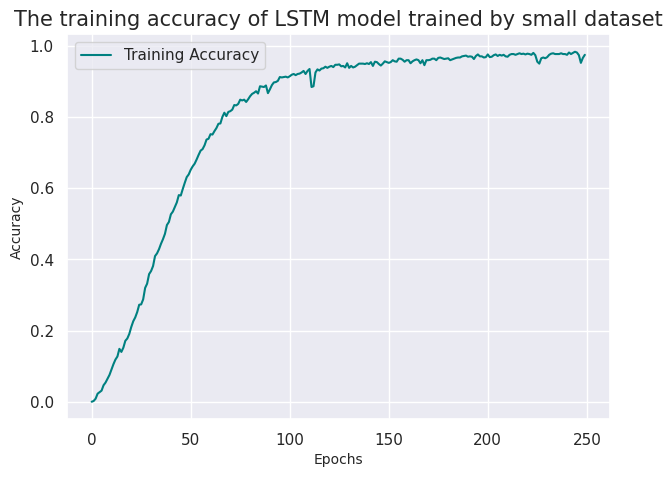

In [58]:
plt.figure(figsize = (7, 5))
plt.plot(history1.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.title('The training accuracy of LSTM model trained by small dataset', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

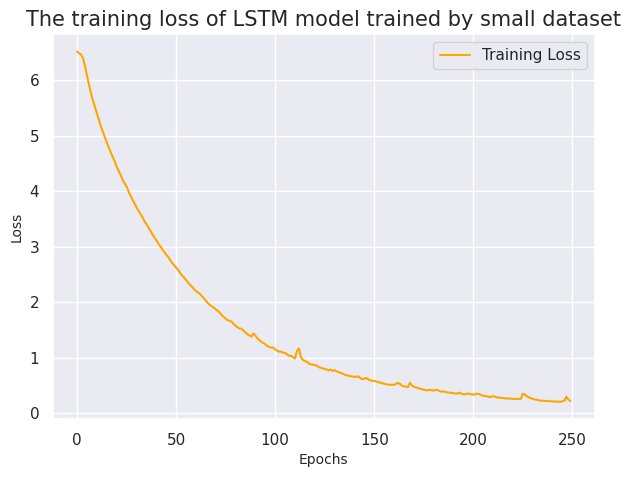

In [59]:
plt.figure(figsize = (7, 5))
plt.plot(history1.history['loss'], label = 'Training Loss', color = 'orange')
plt.title('The training loss of LSTM model trained by small dataset', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
while True:
    input_text = input('You: ')
    if input_text == 'finish':
        break
    else:
        tok_input = tokenizer.texts_to_sequences([input_text])
        pad_input = pad_sequences(tok_input, maxlen = maxlen, padding = 'post')
        print('** you:', input_text)
        print('++ bot:',le.inverse_transform([np.argmax(model1.predict(pad_input))])[0])
        print('==============================================================')

You:  How many colors are there in a rainbow


** you: How many colors are there in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
++ bot: 7


You:  many colors are there in a rainbow


** you: many colors are there in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
++ bot: 7


You:  colors are there in a rainbow


** you: colors are there in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
++ bot: Triangle


You:  are there in a rainbow


** you: are there in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
++ bot: Triangle


You:  there in a rainbow


** you: there in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
++ bot: Sty


You:  are in a rainbow


** you: are in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot: Sty


You:  are a rainbow


** you: are a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
++ bot: Sty


You:  a rainbow


** you: a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
++ bot: Sty


You:  rainbow


** you: rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
++ bot: Peacock


You:  are rainbow


** you: are rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
++ bot: Sides


You:  colors in a rainbow?


** you: colors in a rainbow?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
++ bot: Yen


You:  colors are in a rainbow?


** you: colors are in a rainbow?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
++ bot: Sty


You:  colors in a rainbow


** you: colors in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
++ bot: Yen


You:  Say the number of colors of the rainbow


** you: Say the number of colors of the rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
++ bot: Hydrogen


You:  How many colors can be seen in a rainbow?


** you: How many colors can be seen in a rainbow?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot: 7


You:  Name the number that determines the number of colors in a rainbow


** you: Name the number that determines the number of colors in a rainbow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
++ bot: Camel


In [62]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 28, 100)               │         158,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (32, 30)                    │          13,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 669)                   │          20,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,779 (1.00 MB)

 Trainable params: 34,659 (135.39 KB)

 Non-trainable params: 158,800 (620.31 KB)

 Optimizer params: 69,320 (270.79 KB)

In [63]:
tokenizer2 = Tokenizer()

In [64]:
tokenizer2.fit_on_texts(df_t['question'])

In [65]:
seq2 = tokenizer2.texts_to_sequences(df_t['question'])

In [66]:
vocab_size2 = len(tokenizer2.word_index) + 1
vocab_size2

3469

In [68]:
maxlen2 = max([len(i) for i in seq2])
maxlen2

38

In [69]:
pad_seq2 = pad_sequences(seq2, maxlen = maxlen2, padding = 'post')

In [71]:
y_2 = le.fit_transform(df_t['answer'])

In [72]:
embedding_vectors2 = np.zeros((vocab_size2, 100))
for word, index in tokenizer2.word_index.items():
    vec2 = embedding_matrix.get(word)
    if vec2 is not None:
        embedding_vectors2[index] = vec2

In [73]:
embedding_vectors2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.1529    , -0.24279   ,  0.89837003, ..., -0.59100002,
         1.00390005,  0.20664001],
       ...,
       [ 0.33107999,  0.19363999,  0.16607   , ..., -0.33899   ,
         0.59354001, -0.016754  ],
       [ 0.25271001, -0.13665999, -0.23085   , ..., -0.65002   ,
        -0.38187   ,  0.18661   ],
       [-0.12435   ,  0.65744001, -0.11722   , ..., -0.56651998,
         0.25158   ,  0.18813001]])

In [78]:
model2 = Sequential()

In [79]:
model2.add(Embedding(vocab_size2, 100, embeddings_initializer = Constant(embedding_vectors2), trainable = False))
model2.add(Bidirectional(LSTM(15)))
model2.add(Dense(669, activation = 'softmax'))

In [80]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [81]:
history2 = model2.fit(pad_seq2, y_2, epochs = 130)

Epoch 1/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0055 - loss: 6.4950
Epoch 2/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0262 - loss: 6.2884
Epoch 3/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0360 - loss: 5.8667
Epoch 4/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0819 - loss: 5.5373
Epoch 5/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1045 - loss: 5.2412
Epoch 6/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1338 - loss: 4.9827
Epoch 7/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1576 - loss: 4.7443
Epoch 8/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2022 - loss: 4.4843
Epoch 9/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2210 - loss: 4.3090
Epoch 10/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2515 - loss: 4.1196
Epoch 11/130
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2897 - loss: 3.9227
Epoch 12/130
116/116 ━━━━━━━━━

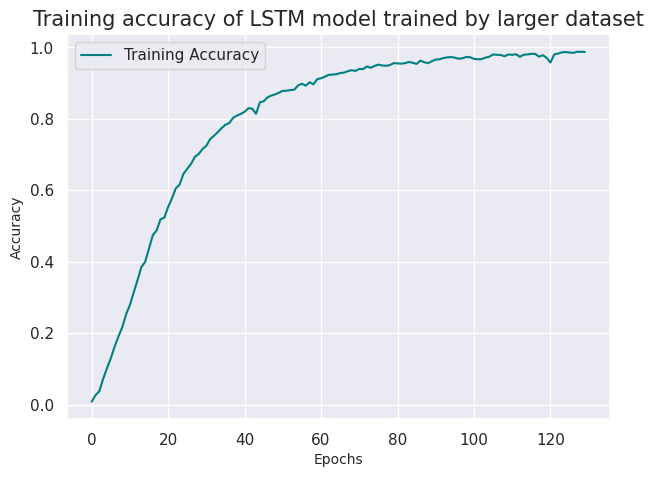

In [82]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.title('Training accuracy of LSTM model trained by larger dataset', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

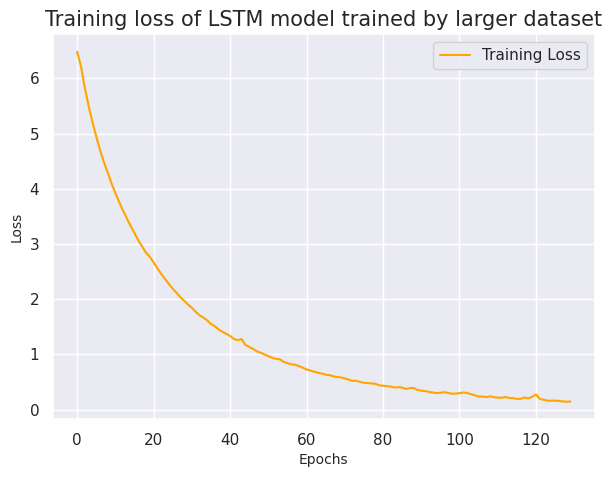

In [83]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'orange')
plt.title('Training loss of LSTM model trained by larger dataset', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [109]:
df_t.sample(10)

,question,answer
763,How many age constitute a decade?,Ten
74,Who be the inventor of Television set?,John Logie Baird
208,Republic Plot are bear in every _ years,4 years
117,Shark be colour blind. True or False?,FALSE
410,World health organization is popularly known a...,Sardar Vallabh Bhai Patel
89,What covers around 71% of the Earth ’ s surfac...,Water
330,Public figure the bod with three slope?,Triangle
70,Who get word electrical energy?,Benjamin Franklin
13,Which be the largest creature in the world?,Blue whale
900,Who was dub the “ Little Corporal ”?,Napolean Bonaparte


In [111]:
df_t[df_t['answer'] == 'John Logie Baird']

,question,answer
74,Who be the inventor of Goggle box?,John Logie Baird
690,World health organization excogitate the telev...,John Logie Baird
74,Who be the inventor of Television set?,John Logie Baird
690,Who formulate the television set?,John Logie Baird
74,World health organization is the discoverer of...,John Logie Baird
690,World health organization invent the television?,John Logie Baird
74,Who live the artificer of Television system?,John Logie Baird
690,World health organization make up the television?,John Logie Baird


In [112]:
df_t[df_t['answer'] == 'Blue whale']

,question,answer
13,Which follow the largest animal in the world?,Blue whale
13,Which be the largest creature in the world?,Blue whale
13,Which follow the big animal in the world?,Blue whale
13,Which be the large animal in the world?,Blue whale


In [113]:
while True:
    inp_text2 = input('you: ')
    if inp_text2 == 'finish':
        break
    else:
        inp_seq1 = tokenizer.texts_to_sequences([inp_text2])
        pad_inp1 = pad_sequences(inp_seq1, maxlen = maxlen, padding = 'post')
        inp_seq2 = tokenizer2.texts_to_sequences([inp_text2])
        pad_inp2 = pad_sequences(inp_seq2, maxlen = maxlen2, padding = 'post')
        print('** you:', inp_text2)
        print('++ bot larger:', le.inverse_transform([np.argmax(model2.predict(pad_inp2))])[0])
        print('++ bot smaller:', le.inverse_transform([np.argmax(model1.predict(pad_inp1))])[0])
        print('===============================================================================')

you:  Who be the inventor of Television set?


** you: Who be the inventor of Television set?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
++ bot larger: John Logie Baird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot smaller: Marconi


you:  Who formulate the television set?


** you: Who formulate the television set?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
++ bot larger: John Logie Baird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
++ bot smaller: John Logie Baird


you:  World health organization invent the television?


** you: World health organization invent the television?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
++ bot larger: John Logie Baird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
++ bot smaller: The three-toed sloth


you:  Who live the artificer of Television system?	


** you: Who live the artificer of Television system?	
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot larger: John Logie Baird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
++ bot smaller: CPU


you:  Which follow the largest animal in the world?


** you: Which follow the largest animal in the world?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
++ bot larger: Blue whale
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot smaller: Blue whale


you:  Which be the largest creature in the world?	


** you: Which be the largest creature in the world?	
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot larger: Blue whale
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
++ bot smaller: India


you:  Which follow the big animal in the world?


** you: Which follow the big animal in the world?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
++ bot larger: Blue whale
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
++ bot smaller: Africa


you:  Which be the large animal in the world?


** you: Which be the large animal in the world?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
++ bot larger: Blue whale
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
++ bot smaller: Diamond


you:  finish
